# **Machine Learning Based Classification of Suicidal Thoughts From Social Media Comments**

### **Data Preprocessing**


In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import timeit

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential

In [4]:
# Get the data

full_data_path = "/content/train.csv"
test_data_X_path = "/content/test.csv"
test_data_y_path = "/content/test_labels.csv"

full_data = pd.read_csv(full_data_path)
test_data_X = pd.read_csv(test_data_X_path)
test_data_y = pd.read_csv(test_data_y_path)

In [5]:
full_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
print(f"There are {len(full_data)} observations in full data.")

There are 159571 observations in full data.


In [7]:
test_data_X.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
test_data_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [9]:
full_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
full_data["comment_text"].values

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [11]:
full_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [12]:
train_sentences=full_data['comment_text']
test_sentences=test_data_X['comment_text']

In [13]:
import re
import string

# Function to clean text by normalizing it and removing contractions
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Replace contractions with their expanded forms
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    # Remove all non-alphabetic characters
    text = re.sub("[^a-z]", " ", text)
    # Remove all non-word characters
    text = re.sub('\W', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub('\s+', ' ', text)
    # Strip leading and trailing whitespace
    text = text.strip(' ')
    return text

# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Function to remove special characters like newlines and tabs
def remove_special_chars(text):
    return text.replace("\n", " ").replace("\t", " ").strip()

# Function to normalize spacing by collapsing multiple spaces into a single space
def normalize_spacing(text):
    return " ".join(text.split())


# Main text processing function that applies all preprocessing steps
def process_text(text):
    text= clean_text(text)
    text = remove_punctuation(text)
    text = remove_special_chars(text)
    text = normalize_spacing(text)
    return text


# apply preprocessing
train_sentences = train_sentences.map(process_text)
test_sentences = test_sentences.map(process_text)

In [14]:
print(train_sentences)

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i am s...
2         hey man i am really not trying to edit war it ...
3         more i cannot make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566    and for the second time of asking when your vi...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570    and i really do not think you understand i cam...
Name: comment_text, Length: 159571, dtype: object


In [15]:
print(test_sentences)

0         yo bitch ja rule is more succesful then you wi...
1                   from rfc the title is fine as it is imo
2                            sources zawe ashton on lapland
3         if you have a look back at the source the info...
4                 i do not anonymously edit articles at all
                                ...                        
153159    i totally agree this stuff is nothing but too ...
153160    throw from out field to home plate does it get...
153161    okinotorishima categories i see your changes a...
153162    one of the founding nations of the eu germany ...
153163    stop already your bullshit is not welcome here...
Name: comment_text, Length: 153164, dtype: object


### **Natural Language Processing (NLP)**

In [16]:
#Import Libraries

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
# Tokenization
def tokenization_process(text):
    return word_tokenize(text)

# Apply preprocessing
train_sentences = train_sentences.map(tokenization_process)
test_sentences = test_sentences.map(tokenization_process)

In [18]:
print(train_sentences)

0         [explanation, why, the, edits, made, under, my...
1         [d, aww, he, matches, this, background, colour...
2         [hey, man, i, am, really, not, trying, to, edi...
3         [more, i, can, not, make, any, real, suggestio...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, theres, no, actual, article, fo...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, do, not, think, you, understa...
Name: comment_text, Length: 159571, dtype: object


In [19]:
print(test_sentences)

0         [yo, bitch, ja, rule, is, more, succesful, the...
1         [from, rfc, the, title, is, fine, as, it, is, ...
2                      [sources, zawe, ashton, on, lapland]
3         [if, you, have, a, look, back, at, the, source...
4         [i, do, not, anonymously, edit, articles, at, ...
                                ...                        
153159    [i, totally, agree, this, stuff, is, nothing, ...
153160    [throw, from, out, field, to, home, plate, doe...
153161    [okinotorishima, categories, i, see, your, cha...
153162    [one, of, the, founding, nations, of, the, eu,...
153163    [stop, already, your, bullshit, is, not, welco...
Name: comment_text, Length: 153164, dtype: object


In [20]:
# Remove stopwords
def remove_stopwords(text):
    tokens = [word for word in text if word not in stop_words]
    return tokens

# Apply preprocessing
train_sentences = train_sentences.map(remove_stopwords)
test_sentences = test_sentences.map(remove_stopwords)

In [21]:
print(train_sentences)

0         [explanation, edits, made, username, hardcore,...
1         [aww, matches, background, colour, seemingly, ...
2         [hey, man, really, trying, edit, war, guy, con...
3         [make, real, suggestions, improvement, wondere...
4                       [sir, hero, chance, remember, page]
                                ...                        
159566    [second, time, asking, view, completely, contr...
159567          [ashamed, horrible, thing, put, talk, page]
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, think, understand, came, idea, bad, r...
Name: comment_text, Length: 159571, dtype: object


In [22]:
print(test_sentences)

0         [yo, bitch, ja, rule, succesful, ever, whats, ...
1                                   [rfc, title, fine, imo]
2                          [sources, zawe, ashton, lapland]
3         [look, back, source, information, updated, cor...
4                             [anonymously, edit, articles]
                                ...                        
153159         [totally, agree, stuff, nothing, long, crap]
153160    [throw, field, home, plate, get, faster, throw...
153161    [okinotorishima, categories, see, changes, agr...
153162    [one, founding, nations, eu, germany, law, ret...
153163    [stop, already, bullshit, welcome, fool, think...
Name: comment_text, Length: 153164, dtype: object


In [23]:
#Lemmatization
def lemmatize_words(text):
    tokens = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(tokens)

# Apply preprocessing
train_sentences = train_sentences.map(lemmatize_words)
test_sentences = test_sentences.map(lemmatize_words)

In [24]:
print(train_sentences)

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object


In [25]:
print(test_sentences)

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object


In [26]:
full_data['comment_text']=train_sentences
test_data_X['comment_text']=test_sentences

In [27]:
full_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0


In [28]:
test_data_X.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland
3,00017563c3f7919a,look back source information updated correct f...
4,00017695ad8997eb,anonymously edit article


In [29]:
# Merging the X and y part together
test_dataframe = pd.merge(test_data_X, test_data_y, how="inner", on="id")

# Remove all the rows having missing values (-1)
test_data = test_dataframe[test_dataframe["toxic"] != -1].reset_index(drop=True)

test_data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
60060,effcb387c2b36113,circle fifth opus related circle fifth alterna...,0,0,0,0,0,0
15202,3c926996c0fdb669,well done important film history indian cinema,0,0,0,0,0,0
15589,3e0198b115ed90f9,july utc exactly type fudging fact serb thrive...,0,0,1,0,0,0
59868,ef2cf645c6a4702e,lotto lottery lottery ticket lottery software ...,0,0,0,0,0,0
10961,2bcd39471809cd43,lyon suburb removed reference suburb named joi...,0,0,0,0,0,0


In [30]:
print(f"We have {len(test_dataframe)} observations in test data.")

We have 153164 observations in test data.


In [31]:
# Remove the unnecessary data

del test_data_X
del test_data_y

In [32]:
full_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [33]:
full_data["comment_text"].values

array(['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired',
       'aww match background colour seemingly stuck thanks talk january utc',
       'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
       ...,
       'spitzer umm there actual article prostitution ring crunch captain',
       'look like actually put speedy first version deleted look',
       'really think understand came idea bad right away kind community go bad idea go away instead helping rewrite'],
      dtype=object)

In [34]:
full_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training set and validation set
train_data, val_data = train_test_split(full_data, train_size=0.8, random_state=10)

In [36]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
55539,9468d5269b0d2506,vandalise user page help talk aug utc,0,0,0,0,0,0
126749,a5e1e2ea7fd3e8fe,notability would like know exactly notable iif...,0,0,0,0,0,0
149145,57d199a93312f597,may utc user gfhandel clearly correct dulithgo...,0,0,0,0,0,0
146072,26994e3fb1c637c6,image source problem image lucian bute jpg tha...,0,0,0,0,0,0
8369,163cfc1e24313408,neutrality article make explicit ghost superna...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9372,18decfd4a7f8bf12,enclave new civil liberty removed third link t...,0,0,0,0,0,0
105595,34fd7c8a57087b48,vandalishm article writing,0,0,0,0,0,0
93553,fa214073275994b4,wanting recreate page awhile anyway might able...,0,0,0,0,0,0
94735,fd441992a780a336,famous newspaer,0,0,0,0,0,0


In [37]:
val_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
33683,59d3f3ec8672a349,two week bit abuse power,0,0,0,0,0,0
65066,ae11f96ac7a0d622,eelam war iv could please see eelam war iv thanks,0,0,0,0,0,0
115957,6c08726414e91327,true beginning show natalia germanou say sourc...,0,0,0,0,0,0
95080,fe3170e3ccb14a21,correct,0,0,0,0,0,0
53051,8dc6f6c9091fcc8b,bad man make much vandalism,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1411,03cd3bc6e0953f94,one sad little individual,1,0,0,0,0,0
57540,99ea0ad7b6c4a80b,bla bla bla link proof,0,0,0,0,0,0
44229,761eaeeb163068dc,pineapple tart yum found malaysian supermarket...,0,0,0,0,0,0
13495,239e6bd4c49b63f9,gerda make je suis hafspajen sign anyway artic...,0,0,0,0,0,0


In [38]:
train_sentences=train_data['comment_text']
train_labels = train_data.iloc[:, 2:]

val_sentences=val_data['comment_text']
val_labels = val_data.iloc[:, 2:]

test_sentences=test_data['comment_text']
test_labels = test_data.iloc[:, 2:]

In [39]:
train_sentences

55539                 vandalise user page help talk aug utc
126749    notability would like know exactly notable iif...
149145    may utc user gfhandel clearly correct dulithgo...
146072    image source problem image lucian bute jpg tha...
8369      neutrality article make explicit ghost superna...
                                ...                        
9372      enclave new civil liberty removed third link t...
105595                           vandalishm article writing
93553     wanting recreate page awhile anyway might able...
94735                                       famous newspaer
83209          suspect sceptre correct previously discussed
Name: comment_text, Length: 127656, dtype: object

In [40]:
train_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
55539,0,0,0,0,0,0
126749,0,0,0,0,0,0
149145,0,0,0,0,0,0
146072,0,0,0,0,0,0
8369,0,0,0,0,0,0
...,...,...,...,...,...,...
9372,0,0,0,0,0,0
105595,0,0,0,0,0,0
93553,0,0,0,0,0,0
94735,0,0,0,0,0,0


In [41]:
val_sentences

33683                              two week bit abuse power
65066     eelam war iv could please see eelam war iv thanks
115957    true beginning show natalia germanou say sourc...
95080                                               correct
53051                           bad man make much vandalism
                                ...                        
1411                              one sad little individual
57540                                bla bla bla link proof
44229     pineapple tart yum found malaysian supermarket...
13495     gerda make je suis hafspajen sign anyway artic...
90865     sorry monkey page got locked figure report emp...
Name: comment_text, Length: 31915, dtype: object

In [42]:
val_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
33683,0,0,0,0,0,0
65066,0,0,0,0,0,0
115957,0,0,0,0,0,0
95080,0,0,0,0,0,0
53051,0,0,0,0,0,0
...,...,...,...,...,...,...
1411,1,0,0,0,0,0
57540,0,0,0,0,0,0
44229,0,0,0,0,0,0
13495,0,0,0,0,0,0


In [43]:
test_sentences

0        thank understanding think highly would revert ...
1                                   dear god site horrible
2        somebody invariably try add religion really me...
3        say right type type institution needed case th...
4        adding new product list make sure relevant add...
                               ...                        
63973    jerome see never got around surprised looked e...
63974    lucky bastard http wikimediafoundation org wik...
63975                        shame want speak gay romanian
63976    mel gibson nazi bitch make shitty movie much b...
63977    unicorn lair discovery supposedly unicorn lair...
Name: comment_text, Length: 63978, dtype: object

In [44]:
test_labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,0,0,0,0,0,0
63975,0,0,0,0,0,0
63976,1,0,1,0,1,0


In [45]:
# Convert the pandas DataFrame or Series to a NumPy array

train_sentences = train_sentences.to_numpy()
train_labels = train_labels.to_numpy()
val_sentences = val_sentences.to_numpy()
val_labels = val_labels.to_numpy()
test_sentences =test_sentences.to_numpy()
test_labels=test_labels.to_numpy()

In [46]:
train_sentences

array(['vandalise user page help talk aug utc',
       'notability would like know exactly notable iifa award saw firsrt ever ceremony tv noticed performer coming collect award award entail performer personally receiving award indicates measure seriousness part exactly award granted peer reviewed industry professional like oscar popular vote talk',
       'may utc user gfhandel clearly correct dulithgow coming deciding cad editor notable clearly way base user ryan vesey made uncanny pithy edit summary million google search result take afd wish thus user agreement moreover duncan last day delete manner cad program list clearly without consensus need clear consensus edits copyediting instead massive use delete key editor en wikipedia build project way thing done product year consensus building evolution process moreover editor active cad related article tend extensive experience subject matter clear evolved intention list cad editor make inclusive comprehensive list reader use authoritat

In [47]:
train_labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

# Define the maximum number of tokens (words) to be considered in the tokenizer
max_tokens=100000

# Create a Tokenizer object that will be used to vectorize the text corpus
tokenizer = Tokenizer(num_words=max_tokens)
# Fit the tokenizer on the training sentences to build the word index
tokenizer.fit_on_texts(train_sentences)

# convert sentences to integer sequences
# Each word in a sentence is replaced with its corresponding integer index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences=tokenizer.texts_to_sequences(test_sentences)

In [49]:
train_sequences

[[3025, 16, 2, 43, 4, 3300, 101],
 [346,
  5,
  8,
  13,
  488,
  214,
  47742,
  788,
  574,
  68144,
  244,
  5202,
  768,
  500,
  7837,
  829,
  4618,
  788,
  788,
  9808,
  7837,
  689,
  2976,
  788,
  2303,
  2076,
  8971,
  107,
  488,
  788,
  2254,
  1157,
  1162,
  1652,
  1166,
  8,
  5763,
  1028,
  587,
  4],
 [20,
  101,
  16,
  38435,
  239,
  253,
  38436,
  829,
  4363,
  9299,
  37,
  214,
  239,
  34,
  1632,
  16,
  2434,
  20532,
  57,
  28905,
  32745,
  17,
  308,
  608,
  480,
  462,
  352,
  63,
  671,
  325,
  614,
  16,
  1478,
  2081,
  9993,
  159,
  98,
  222,
  1014,
  9299,
  946,
  67,
  239,
  96,
  208,
  24,
  260,
  208,
  54,
  5919,
  256,
  2165,
  18,
  222,
  1403,
  37,
  327,
  3,
  1688,
  295,
  34,
  42,
  116,
  892,
  75,
  208,
  1045,
  1558,
  411,
  2081,
  37,
  1097,
  9299,
  331,
  1,
  1844,
  2456,
  802,
  109,
  181,
  260,
  5203,
  1130,
  67,
  9299,
  37,
  19,
  7641,
  3086,
  67,
  434,
  18,
  3301,
  10,
  946,
  1

In [50]:
train_sequences[0]

[3025, 16, 2, 43, 4, 3300, 101]

In [51]:
val_sequences[0]

[76, 338, 248, 724, 349]

In [52]:
test_sequences[0]

[55, 878, 11, 895, 5, 250, 96, 53]

In [53]:
# ----------------------This is taken from Kaggle------------------------------

max_length = 300 #depending upon the mean length of the comments
padding_type = "post" # Add padding at the end of the sequence
trunc_type = "post"  # Truncate sequences at the end if they exceed max_length

# Apply padding and truncating to sequences
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
val_sequences = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_sequences=  pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [54]:
# Remove the unnecessary data

del full_data
del test_dataframe

### **Model Building**

In [55]:
#Long Short-Term Memory(LSTM) Model

# Define the Sequential model
model = Sequential([
    layers.Embedding(max_tokens+1, 32),  # Embedding layer: Converts input tokens (indices) into dense vectors of fixed size
    layers.Bidirectional(layers.LSTM(32, return_sequences=False)), # return_sequences=False: Only returns the output of the last time step
    layers.Dense(256, activation="relu"), # Dense (Fully connected) layer with ReLU activation: Learns complex patterns in the data
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(6, activation="sigmoid")  # Output Dense layer with sigmoid activation: Outputs probabilities for multi-label classification
])


# Compile the model with specified settings
model.compile(
    optimizer="adam", # Adam is an adaptive learning rate optimization algorithm that has been popular in deep learning
    loss="binary_crossentropy", # Binary cross-entropy is a common loss function for binary classification tasks
    metrics=metrics.BinaryAccuracy() # BinaryAccuracy computes the frequency with which predictions match labels for binary classification
)


callbacks = [
    # EarlyStopping callback to stop training when the validation loss has stopped improving.
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True, # Restore the model weights from the epoch with the best validation loss.
        start_from_epoch=1, # Start monitoring from epoch 1 to allow the model to train for at least one epoch.
        verbose=1 # Verbosity mode, 1 = progress messages are printed.
    ),
    # ReduceLROnPlateau callback to reduce the learning rate when the validation loss has stopped improving.
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5, # Factor by which the learning rate will be reduced. new_lr = lr * factor.
        patience=3,
        verbose=1, # Verbosity mode, 1 = progress messages are printed.
        min_lr=1e-6  # Lower bound on the learning rate.
    )
]


In [56]:
batch_size=64 # Number of samples per gradient update

start = timeit.default_timer() # Record the start time of model training

# Fit the model to the training data
model_history = model.fit(
    train_sequences,
    train_labels,
    epochs=5, # Number of epochs (iterations over the entire dataset)
    verbose=1, # Verbosity mode (1 for progress bar, 0 for silent)
    callbacks=callbacks, # List of callbacks to apply during training
    batch_size=batch_size, # Number of samples per gradient update
    validation_data=(val_sequences, val_labels),
).history # History object containing training metrics

end = timeit.default_timer() # Record the end time of model training

# Print the time taken for model training
print(f"It took {end - start} seconds to train the model.")

Epoch 1/5
1995/1995 [==============================] - 161s 78ms/step - loss: 0.0652 - binary_accuracy: 0.9788 - val_loss: 0.0501 - val_binary_accuracy: 0.9821 - lr: 0.0010
Epoch 2/5
1995/1995 [==============================] - 67s 34ms/step - loss: 0.0430 - binary_accuracy: 0.9833 - val_loss: 0.0485 - val_binary_accuracy: 0.9822 - lr: 0.0010
Epoch 3/5
1995/1995 [==============================] - 61s 31ms/step - loss: 0.0364 - binary_accuracy: 0.9852 - val_loss: 0.0511 - val_binary_accuracy: 0.9814 - lr: 0.0010
Epoch 4/5
1995/1995 [==============================] - 55s 27ms/step - loss: 0.0305 - binary_accuracy: 0.9872 - val_loss: 0.0540 - val_binary_accuracy: 0.9814 - lr: 0.0010
Epoch 5/5
1995/1995 [==============================] - ETA: 0s - loss: 0.0254 - binary_accuracy: 0.9895
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1995/1995 [==============================] - 56s 28ms/step - loss: 0.0254 - binary_accuracy: 0.9895 - val_loss: 0.0645 - val_binary

### **Model Testing**

In [57]:
 # //----------------------Kaggle--------------------
# Evaluate the accuracy of the model on the test set
test_accuracy = model.evaluate(test_sequences, test_labels)
print("Test Accuracy:", test_accuracy[1])

2000/2000 [==============================] - 22s 11ms/step - loss: 0.0960 - binary_accuracy: 0.9677
Test Accuracy: 0.9677154421806335


In [58]:
# --------------------From Kaggle---------------------------
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Calculate the precision, recall, and F1 scores of the model
predictions = model.predict(test_sequences)

# Convert probability values to binary predictions (threshold can be adjusted)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Calculate the precision, recall, and F1 scores of each label
precision = precision_score(test_labels, binary_predictions, average='weighted')
recall = recall_score(test_labels, binary_predictions, average='weighted')
f1 = f1_score(test_labels, binary_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(test_labels, binary_predictions)
print(class_report)

2000/2000 [==============================] - 23s 11ms/step
Precision: 0.5557076118707109
Recall: 0.7156849220582149
F1 Score: 0.6159180790088336
              precision    recall  f1-score   support

           0       0.51      0.85      0.64      6090
           1       0.35      0.33      0.34       367
           2       0.63      0.74      0.68      3691
           3       0.00      0.00      0.00       211
           4       0.61      0.62      0.62      3427
           5       0.53      0.32      0.39       712

   micro avg       0.56      0.72      0.63     14498
   macro avg       0.44      0.48      0.45     14498
weighted avg       0.56      0.72      0.62     14498
 samples avg       0.07      0.07      0.07     14498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Visualization**

<Figure size 800x500 with 0 Axes>

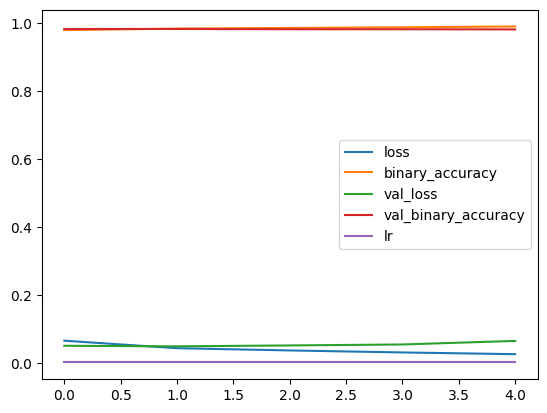

In [59]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(model_history).plot()
plt.show()

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3200032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

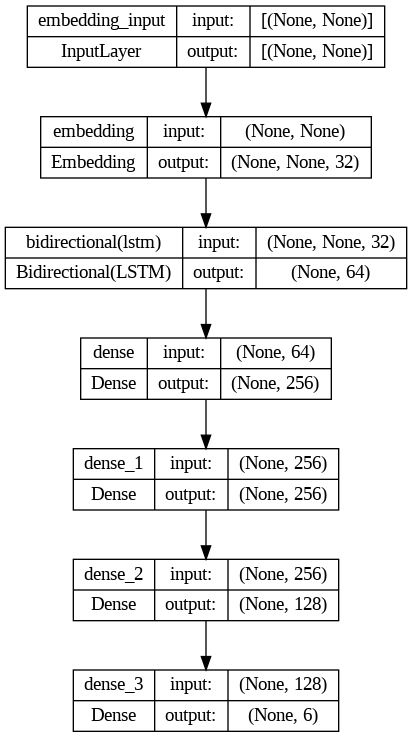

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### **Predictive Model**

In [62]:
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 # Assuming text_vectorization function is defined elsewhere
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [63]:
# --------------------Taken from kaggle------------------

def predict(text):

  # Clean the text
  text=process_text(text)

  # Tokenize the text
  text = word_tokenize(text)

  # Remove stopwords
  text = [word for word in text if word not in stop_words]

  # Lemmatize the words
  text = [lemmatizer.lemmatize(word) for word in text]

  # Join
  text = ' '.join(text)
  sequences = tokenizer.texts_to_sequences([text])

  padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  # get predictions for toxicity
  predictions = model.predict(padded_sequences)[0]

  # Format prediction text
  prediction_dict = {}
  for i, col in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
      prediction_dict[col]=predictions[i]

  return prediction_dict


In [64]:
predict("'You freaking suck! I am going to hit you.'")

1/1 [==============================] - 0s 71ms/step


{'toxic': 0.98548526,
 'severe_toxic': 0.02026122,
 'obscene': 0.7409259,
 'threat': 0.0012469325,
 'insult': 0.7492936,
 'identity_hate': 0.009381005}

### **Model Save**

In [65]:
import json

# 1. Save the tokenizer to a JSON file
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)

model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
